# 1. Intro

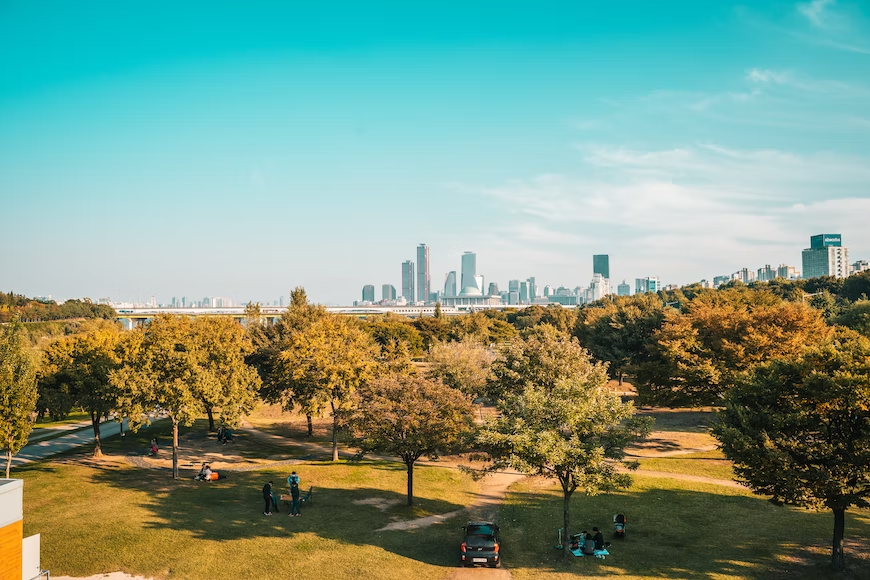



안녕하세요! Stage 6까지 잘 따라와주신 데이커 분들에게 칭찬의 박수를 보냅니다 👏👏



앞서 Stage 5에서 부스팅 기법을 사용하는 여러 가지 모델과 하이퍼파라미터에 대해 알아보고, 모델의 성능을 측정하여 최종 후보 모델을 선정하였어요. 



하지만 더 좋은 예측을 하기 위해서는 **새로운 데이터를 추가적으로 활용하거나 모델의 하이퍼파라미터를 튜닝하는 과정**이 필요한데요! 

Stage 6에서는 이러한 과정을 통해 최적의 모델을 선정해볼 거에요.

벌써 마지막 PBL이라니, 너무 아쉬워요 😂 

이번 스테이지에는 오픈API 활용 등 고수가 되기 위한 꿀팁이 많이 있으니, 끝까지 열심히 해서 유종의 미를 거두어 봐요 우리 💕

그럼 데이크루 4기 한남더힐의 내집마련을 위한 마지막 과정, 시작할 준비되셨나요? 😊 

---

# 2. 데이터 불러오기

시작하기에 앞서 분석에 필요한 패키지들과 데이터를 불러오겠습니다! 



이번 스테이지에는 수행 시간이 오래 걸리는 코드들이 많이 포함되어 있는데요... 

따라서 코드의 연산 속도를 측정하는 **tqdm** 패키지를 활용하겠습니다 🙂

- `tqdm(순회 가능 객체)`: 객체의 길이를 기반으로 진행 상황을 게이지와 %로 알려줍니다.

In [ ]:
# 주피터라이트에서 seaborn, requests 사용하기
import micropip
await micropip.install('seaborn')
await micropip.install('requests')

In [ ]:
# 분석에 필요한 패키지를 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import requests
from urllib.parse import urlparse

# 성능평가
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# 사용할 모델
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# train 데이터를 불러옵니다.
train = pd.read_csv('train.csv')

# 모델 속도 측정
import time

In [ ]:
# 코드 연산 속도를 측정하는 tqdm 패키지를 불러옵니다.
from tqdm.auto import tqdm

In [ ]:
# RMSE 계산 함수
def RMSE(y_real,y_pred):
  return mean_squared_error(y_real, y_pred)**0.5

---

# 3. 추가데이터 활용하기

## 3.1 자치구별 법정동 데이터

Stage 3에서 법정동의 개수가 너무 많아 인코딩할 수 없다고 판단하여, 법정동을 의미하는 'dong' 컬럼을 삭제했었는데요.

이 컬럼을 활용할 수 있는 방법이 있을까요? 🤔

우선 간단하게 서울특별시, 부산광역시의 법정동을 살펴보겠습니다!

In [ ]:
# 서울특별시 아파트 법정동(dong)의 고유값 개수를 구합니다.
print('서울특별시 법정동 개수: ', len(train[train['city']=='서울특별시']['dong'].unique()))
# 부산광역시 아파트 법정동(dong)의 고유값 개수를 구합니다.
print('부산광역시 법정동 개수: ', len(train[train['city']=='부산광역시']['dong'].unique()))

서울특별시 법정동 개수:  330
부산광역시 법정동 개수:  147


In [ ]:
# 서울특별시, 부산광역시 법정동의 고유값을 각각 저장합니다.
dong_list_s = train[train['city']=='서울특별시']['dong'].unique()
dong_list_b = train[train['city']=='부산광역시']['dong'].unique()

In [ ]:
# 서울특별시 법정동의 고유값을 확인합니다.
print(dong_list_s)

['신교동' '필운동' '내수동' '인의동' '이화동' '명륜1가' '명륜2가' '창신동' '숭인동' '평창동' '무악동' '누상동'
 '수송동' '익선동' '동숭동' '부암동' '낙원동' '교북동' '행촌동' '신영동' '신문로1가' '청운동' '견지동' '사직동'
 '혜화동' '통인동' '명륜3가' '당주동' '구기동' '연건동' '충신동' '옥인동' '장충동2가' '신당동' '순화동'
 '중림동' '만리동1가' '회현동1가' '산림동' '남산동2가' '인현동2가' '묵정동' '흥인동' '충무로4가' '을지로5가'
 '황학동' '장충동1가' '정동' '필동3가' '만리동2가' '예장동' '필동1가' '남대문로5가' '회현동2가' '남창동'
 '오장동' '충무로5가' '후암동' '신창동' '산천동' '원효로4가' '효창동' '도원동' '문배동' '한강로2가' '한강로3가'
 '이촌동' '이태원동' '한남동' '서빙고동' '보광동' '동자동' '청파동1가' '용문동' '한강로1가' '청파동3가'
 '동빙고동' '원효로1가' '원효로2가' '청암동' '용산동2가' '용산동5가' '갈월동' '원효로3가' '주성동' '신계동'
 '하왕십리동' '홍익동' '마장동' '사근동' '행당동' '응봉동' '금호동1가' '금호동3가' '금호동4가' '옥수동'
 '성수동1가' '성수동2가' '용답동' '도선동' '송정동' '금호동2가' '상왕십리동' '중곡동' '구의동' '광장동' '자양동'
 '화양동' '군자동' '능동' '용두동' '제기동' '전농동' '답십리동' '장안동' '청량리동' '회기동' '휘경동' '이문동'
 '신설동' '면목동' '상봉동' '중화동' '묵동' '망우동' '신내동' '돈암동' '동소문동4가' '동소문동7가' '삼선동3가'
 '삼선동4가' '삼선동5가' '안암동1가' '안암동3가' '보문동6가' '보문동3가' '정릉동' '길음동' '종암동' '하월곡동'
 '상월곡동' '장위동' '석관동' '보문동2가' '동소문동5가' '동소문동6가' '삼선동2가' 

In [ ]:
# 부산광역시 법정동의 고유값을 확인합니다.
print(dong_list_b)

['영주동' '대청동4가' '보수동1가' '부평동2가' '부평동4가' '신창동2가' '동광동5가' '신창동1가' '보수동3가'
 '보수동2가' '대창동1가' '중앙동4가' '대청동2가' '대청동1가' '동대신동1가' '동대신동2가' '동대신동3가'
 '서대신동1가' '서대신동2가' '서대신동3가' '부민동3가' '토성동1가' '토성동5가' '남부민동' '암남동' '부용동1가'
 '토성동3가' '아미동2가' '부민동1가' '충무동2가' '토성동2가' '초장동' '초량동' '수정동' '좌천동' '범일동'
 '대평동1가' '남항동1가' '남항동3가' '영선동2가' '영선동3가' '영선동4가' '신선동2가' '봉래동1가' '봉래동2가'
 '봉래동3가' '봉래동4가' '봉래동5가' '청학동' '동삼동' '대교동2가' '영선동1가' '남항동2가' '신선동3가'
 '대교동1가' '양정동' '전포동' '부전동' '범천동' '연지동' '초읍동' '부암동' '당감동' '가야동' '개금동' '범전동'
 '명장동' '안락동' '낙민동' '복천동' '수안동' '명륜동' '온천동' '사직동' '칠산동' '대연동' '용호동' '용당동'
 '문현동' '우암동' '감만동' '금곡동' '화명동' '만덕동' '덕천동' '구포동' '반송동' '반여동' '재송동' '우동'
 '중동' '좌동' '송정동' '괴정동' '당리동' '하단동' '신평동' '장림동' '다대동' '구평동' '감천동' '청룡동'
 '남산동' '구서동' '장전동' '부곡동' '서동' '금사동' '회동동' '신호동' '명지동' '지사동' '거제동' '연산동'
 '망미동' '수영동' '민락동' '광안동' '남천동' '삼락동' '모라동' '덕포동' '괘법동' '감전동' '주례동' '학장동'
 '엄궁동' '기장읍 동부리' '기장읍 교리' '기장읍 서부리' '기장읍 대라리' '기장읍 청강리' '정관읍 달산리'
 '일광면 삼성리' '일광면 이천리' '기장읍 대변리' '정관읍 방곡리' '정관읍 용수리' '정관읍 매학리' '정관읍 모전리'
 '

법정동 컬럼을 활용하기 어렵다면, 상위 범주인 자치구로 묶어서 처리해보는 건 어떨까요?

시별로 해당 법정동이 어떤 자치구에 속하는지 알아내는 것이죠 😎



그러기 위해서는 자치구별 법정동 데이터가 필요할 것입니다. 

따라서 <font color=green>**공공데이터포털**</font>에 있는 자치구별 법정동 데이터를 활용하겠습니다 😃

이때 우리 데이터에는 서울특별시와 부산광역시만 존재하므로, <br>
자치구별 법정동 데이터에서 두 도시만 따로 추출하여 각각 csv 파일로 만든 다음 불러올게요!
> 출처: https://www.data.go.kr/data/15063424/fileData.do

In [ ]:
# 서울특별시, 부산광역시의 자치구별 법정동 데이터를 불러옵니다.
seoul_dong = pd.read_csv('서울특별시 자치구별 법정동.csv', encoding='cp949')
busan_dong = pd.read_csv('부산광역시 자치구별 법정동.csv', encoding='cp949')

In [ ]:
# 서울특별시 법정동의 고유값의 개수를 구합니다.
dong_unique_s = seoul_dong['법정동'].unique()
print('서울특별시 법정동 고유값 개수: ', len(dong_unique_s))

서울특별시 법정동 고유값 개수:  465


In [ ]:
# 부산광역시 법정동의 고유값의 개수를 구합니다.
dong_unique_b = busan_dong['법정동'].unique()
print('부산광역시 법정동 고유값 개수: ', len(dong_unique_b))

부산광역시 법정동 고유값 개수:  191


앗! 아까 train 데이터에서 서울특별시, 부산광역시 법정동의 개수는 각각 330개, 147개였는데요. <br>
자치구별 법정동 데이터에서의 법정동 개수는 각각 465개, 191개니까 차이가 있네요 😮

그렇다면 다음과 같은 `set.difference` 메소드를 활용하여, <br>
공공데이터에는 존재하지만 train 데이터에는 존재하지 않는 법정동명이 있는지 확인해보겠습니다 😉

* `set.difference()`: 두 set 간의 차집합(difference)을 구합니다. <br>



또한 편의를 위해 서울특별시, 부산광역시를 나눠서 진행한 다음 나중에 다시 합치겠습니다!

In [ ]:
# 공공데이터에는 존재하지만, train 데이터에는 존재하지 않는 법정동명을 찾아 출력합니다.
complement_s = list(set(dong_list_s).difference(dong_unique_s))
complement_b = list(set(dong_list_b).difference(dong_unique_b))
print(complement_s)
print(complement_b)

[]
['철마면 고촌리', '정관읍 용수리', '장안읍 명례리', '정관읍 매학리', '기장읍 내리', '일광면 이천리', '기장읍 대변리', '정관읍 모전리', '정관읍 방곡리', '기장읍 교리', '장안읍 좌천리', '기장읍 청강리', '기장읍 서부리', '기장읍 동부리', '정관읍 달산리', '일광면 삼성리', '기장읍 대라리']


In [ ]:
# 서울특별시, 부산광역시 데이터를 각각 따로 저장합니다.
seoul_df = train[train['city']=='서울특별시']
busan_df = train[train['city']=='부산광역시']

In [ ]:
# 인덱스를 다시 처음부터 재배열합니다.
seoul_df.reset_index(drop=True, inplace=True)
busan_df.reset_index(drop=True, inplace=True)

(<font color=gray>⚠ 인덱스를 재배열하지 않으면 인덱스를 기반으로 하는 메소드 (iloc등...) 사용에 제약이 있습니다!</font> ⚠)

확인 결과, 서울특별시는 train 데이터의 법정동명이 공공데이터에 모두 존재합니다.

하지만 부산광역시의 경우 train 데이터에는 존재하지만 공공데이터에는 없는 법정동명이 존재하네요 😥



혹시 train 데이터의 부산광역시 법정동과 공공데이터에서 가져온 법정동의 <font color=red>형태</font>가 달랐기 때문에 <br>
difference() 함수를 썼을 때 매칭이 되지 않았던 건 아닐까요? 

흠... 나름 합리적인 의심인 것 같은데요 🤔



일단 부산광역시의 법정동을 쭉 살펴보겠습니다!

In [ ]:
# 부산광역시의 법정동 형태를 살펴봅니다.
print(busan_df['dong'])

0             영주동
1             영주동
2             영주동
3             영주동
4             영주동
           ...   
474263    정관읍 용수리
474264    정관읍 용수리
474265    정관읍 용수리
474266    정관읍 용수리
474267    정관읍 용수리
Name: dong, Length: 474268, dtype: object


빙고! 😉 부산광역시의 법정동은 '영주동'과 같은 형태인 경우도 있지만, '정관읍 용수리'처럼 읍과 리가 합쳐져 있는 경우도 존재하네요!

따라서 "일광면, 정관읍, 장안읍, 기장읍, 철마면"처럼 읍면동 단위로만 남긴 다음, 다시 차집합을 구해보겠습니다.



우선 다음과 같은 **split()** 함수를 사용해서 공백을 기준으로, 공백 앞에 있는 문자만 남겨볼게요 🙂

* `pandas.Series.str.split(pat=None)`: 특정 구분자(pat)를 기준으로 string를 분리합니다. pat default: whitespace

In [ ]:
# 공백을 기준으로, 공백 앞에 있는 문자만 추출해서 저장합니다.
busan_df['dong'] = busan_df['dong'].str.split().str[0]

In [ ]:
# 부산광역시 법정동의 고유값을 저장합니다.
dong_list_b = busan_df['dong'].unique()
# 공공데이터에는 존재하지만, train 데이터에는 존재하지 않는 법정동명을 찾아 출력합니다.
complement_b = list(set(dong_list_b).difference(dong_unique_b))
print(complement_b)

[]


와우, 이제 모든 법정동을 처리할 수 있게 되었네요! 👍

법정동명을 가지고 해당하는 행정구를 찾으려면 매칭할 수 있는 형태가 필요하겠죠???

다음으로 행정구별 법정동 리스트를 담기 위해, {key: value} 형태의 dictionary를 만들겠습니다.
* `{행정구명: [법정동 리스트]...}`

In [ ]:
# 서울특별시 행정구별 법정동 리스트를 담을 빈 딕셔너리를 생성합니다.
seoul_dict = {}
gu_list = seoul_dong['행정구'].unique()
for gu in gu_list:
  seoul_dict[gu]= seoul_dong[seoul_dong['행정구'] == gu]['법정동'].unique()

# 부산광역시 행정구별 법정동 리스트를 담을 빈 딕셔너리를 생성합니다.
busan_dict = {}
gu_list = busan_dong['행정구'].unique()
for gu in gu_list:
  busan_dict[gu]= busan_dong[busan_dong['행정구'] == gu]['법정동'].unique()

In [ ]:
# 딕셔너리를 출력합니다.
print(seoul_dict)

{'용산구': array(['용산동3가', '용산동5가', '한강로3가', '이촌동', '후암동', '용산동2가', '용산동4가', '갈월동',
       '남영동', '용산동1가', '동자동', '서계동', '청파동1가', '청파동2가', '청파동3가', '원효로1가',
       '원효로2가', '신창동', '산천동', '청암동', '원효로3가', '원효로4가', '효창동', '도원동',
       '용문동', '문배동', '신계동', '한강로1가', '한강로2가', '주성동', '용산동6가', '보광동',
       '이태원동', '한남동', '동빙고동', '서빙고동'], dtype=object), '강북구': array(['미아동', '번동', '수유동', '우이동'], dtype=object), '도봉구': array(['쌍문동', '방학동', '창동', '도봉동'], dtype=object), '노원구': array(['월계동', '공릉동', '하계동', '상계동', '중계동'], dtype=object), '광진구': array(['중곡동', '능동', '구의동', '광장동', '자양동', '화양동', '군자동'], dtype=object), '동대문구': array(['신설동', '용두동', '제기동', '전농동', '답십리동', '장안동', '청량리동', '회기동', '휘경동',
       '이문동'], dtype=object), '성북구': array(['동소문동5가', '동소문동6가', '동소문동4가', '성북동', '성북동1가', '돈암동', '동소문동1가',
       '동소문동2가', '동소문동3가', '동소문동7가', '삼선동1가', '삼선동2가', '삼선동3가', '삼선동4가',
       '삼선동5가', '동선동1가', '동선동2가', '동선동3가', '동선동4가', '동선동5가', '안암동1가',
       '안암동2가', '안암동3가', '안암동4가', '안암동5가', '보문동4가', '보문동5가', '보문동6가

In [ ]:
# 딕셔너리를 출력합니다.
print(busan_dict)

{'강서구': array(['눌차동', '천성동', '대항동', '대저1동', '대저2동', '강동동', '명지동', '죽림동', '식만동',
       '죽동동', '봉림동', '송정동', '화전동', '녹산동', '생곡동', '구랑동', '성북동', '지사동',
       '미음동', '범방동', '신호동', '동선동'], dtype=object), '연제구': array(['거제동', '연산동'], dtype=object), '수영구': array(['망미동', '수영동', '민락동', '광안동', '남천동'], dtype=object), '사상구': array(['삼락동', '모라동', '덕포동', '괘법동', '감전동', '주례동', '학장동', '엄궁동'],
      dtype=object), '기장군': array(['기장읍', '장안읍', '철마면', '일광면', '정관읍'], dtype=object), '서구': array(['토성동5가', '초장동', '동대신동1가', '동대신동2가', '동대신동3가', '서대신동1가', '서대신동2가',
       '서대신동3가', '부용동1가', '부용동2가', '부민동1가', '부민동2가', '부민동3가', '토성동1가',
       '토성동2가', '토성동3가', '아미동1가', '아미동2가', '토성동4가', '충무동1가', '충무동2가',
       '충무동3가', '남부민동', '암남동'], dtype=object), '중구': array(['영주동', '대창동1가', '대창동2가', '중앙동1가', '중앙동2가', '중앙동3가', '중앙동4가',
       '중앙동5가', '중앙동6가', '중앙동7가', '동광동1가', '동광동2가', '동광동3가', '동광동4가',
       '동광동5가', '대청동1가', '대청동2가', '대청동3가', '대청동4가', '보수동1가', '보수동2가',
       '보수동3가', '부평동1가', '부평동2가', '부평동3가', '부평동4가', 

구(gu) 컬럼을 새롭게 생성하고, 한 줄씩 dictionary를 확인해서 해당 법정동명이 있는 자치구를 구 컬럼의 값에 넣어주겠습니다.



그런데 짚고 넘어가야 할 게 있습니다 💥💥



서울특별시 <font color=red>은평구 신사동, 강남구 신사동</font>처럼 서로 다른 자치구지만 같은 법정동명을 가지는 경우가 존재할 수 있습니다.

이런 경우는 서로 구분을 지어줘야 해요.

따라서 중복 법정동명은 ','로 값을 모두 받아오도록 하겠습니다 😊

In [ ]:
# 서울특별시, 부산광역시 데이터에 구(gu) 컬럼을 생성합니다.
seoul_df['gu'] = ''
busan_df['gu'] = ''

C:\Users\USER\AppData\Local\Temp\ipykernel_9488\3552975345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_df['gu'] = ''
C:\Users\USER\AppData\Local\Temp\ipykernel_9488\3552975345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan_df['gu'] = ''


다음의 for문은 수행 시간이 매우 오래 걸립니다 😥

그러니 아까 불러왔던 tqdm 패키지를 활용해 코드 연산 속도를 눈으로 확인하면서, 인내심을 갖고 기다려봅시다!!

In [ ]:
# 법정동명이 있는 자치구인 경우, 구(gu) 컬럼의 값으로 넣어줍니다. 중복된 법정동명은 ','로 구분해서 값을 가져옵니다.
for i, dong in tqdm(enumerate(seoul_df['dong'])):
  key = [k for k, v in seoul_dict.items() if dong in v]
  seoul_df['gu'].iloc[i] = ','.join(key)
seoul_df['gu']

0it [00:00, ?it/s]

0         종로구
1         종로구
2         종로구
3         종로구
4         종로구
         ... 
742280    강동구
742281    강동구
742282    강동구
742283    강동구
742284    강동구
Name: gu, Length: 742285, dtype: object

In [ ]:
# 법정동명이 있는 자치구인 경우, 구(gu) 컬럼의 값으로 넣어줍니다. 중복된 법정동명은 ','로 구분해서 값을 가져옵니다.
for i, dong in enumerate(tqdm(busan_df['dong'])):
  key = [k for k, v in busan_dict.items() if dong in v]
  busan_df['gu'].iloc[i] = ','.join(key)
busan_df['gu']

  0%|          | 0/474268 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 474268/474268 [07:46<00:00, 1015.59it/s]


0          중구
1          중구
2          중구
3          중구
4          중구
         ... 
474263    기장군
474264    기장군
474265    기장군
474266    기장군
474267    기장군
Name: gu, Length: 474268, dtype: object

* `enumerate(iterable, start=0)`: 파이썬 내장함수로, (반복 카운트, 열거 객체) 형태로 출력해줍니다.

In [ ]:
# 서울특별시에 존재하는 중복된 법정동명을 확인합니다.
seoul_df.loc[seoul_df['gu'].str.contains(',')]['dong'].unique()

array(['신사동', '신정동'], dtype=object)

In [ ]:
# 부산광역시에 존재하는 중복된 법정동명을 확인합니다.
busan_df.loc[busan_df['gu'].str.contains(',')]['dong'].unique()

array(['송정동'], dtype=object)

확인 결과, 중복되는 법정동명이 다음과 같이 존재하네요!

* `서울특별시: 신사동(은평구, 강남구), 신정동(양천구, 마포구)`
* `부산광역시: 송정동(해운대구, 강서구)`

위 경우처럼 특정 법정동명이 여러 개의 자치구에 속하는 경우에 해당하는 행만 가져온 다음 <br>
주소 정보를 나타내는 'addr_kr' 컬럼을 활용하여, 카카오에서 제공하는 오픈API를 이용해 자치구 정보를 받아오겠습니다 😊



흠.. 🤔 그런데 중복 법정동 행만 가져오고 싶을 땐 어떤 조건을 걸어줘야 할까요?

서울특별시의 단일 자치구는 4글자가 최대이므로, 두 개 이상의 자치구에 해당하는 법정동명이라면 4글자를 초과할 거에요.

이를 조건으로 활용하여 중복 법정동 행만 받아올게요!

---

### API란?

그런데 API란 무엇일까요? 그리고 API는 어떻게 불러올 수 있을까요? 🤔🤔

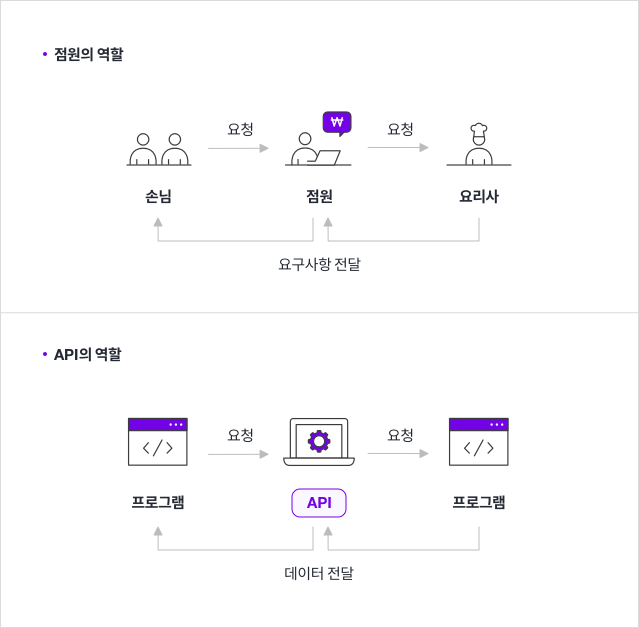

> 출처: [wishket | API란? 비개발자가 알기 쉽게 설명해드립니다!](https://blog.wishket.com/api%EB%9E%80-%EC%89%BD%EA%B2%8C-%EC%84%A4%EB%AA%85-%EA%B7%B8%EB%A6%B0%ED%81%B4%EB%9D%BC%EC%9D%B4%EC%96%B8%ED%8A%B8/)

API의 개념을 비유를 통해 쉽게 알아봅시다 😄





데이커 여러분이 멋진 레스토랑에 있다고 가정해볼게요 😮😮



메뉴판을 보면서 먹음직스러운 스테이크를 고르면, 점원이 주문을 받아 요리사에 요청을 할 거에요. <br>
그러면 요리사는 정성껏 스테이크를 만들어 점원에게 주고, 여러분은 점원이 가져다준 맛있는 음식을 먹을 수 있게 됩니다.



여기서 <font color=blue>**점원**</font>의 역할을 한 번 살펴보겠습니다. <br>
점원은 손님에게 메뉴를 알려주고, 주방에 주문받은 요리를 요청합니다. <br>
그다음 주방에서 완성된 요리를 손님께 다시 전달하지요. 



<font color=blue>**API**</font>는 점원과 같은 역할을 합니다. <br>
손님(프로그램)이 주문할 수 있게 메뉴(명령 목록)를 정리하고, <br>
주문(명령)을 받으면 요리사(응용프로그램)와 상호작용하여 요청된 메뉴(명령에 대한 값)를 전달하죠.

쉽게 말해, <font color=red>**API**</font>는 **프로그램들이 서로 상호작용하는 것을 도와주는 매개체**로 볼 수 있어요.

또한 `오픈API는 누구나 사용할 수 있도록 공개된 API`입니다. <br>
이렇게 개방된 오픈API를 이용해 다양한 서비스나 애플리케이션, 플랫폼을 개발할 수 있어요.

---

### 오픈 API 사용하기

우리는 **카카오**에서 오픈API 방식으로 제공되는 데이터를 가져와서 분석에 활용해볼 건데요!

그러기 위해서는 몇 가지 절차가 거쳐야 해요. 

아래 사이트에 접속하여 Step 1에서 Step 6까지 진행해주세요 😊

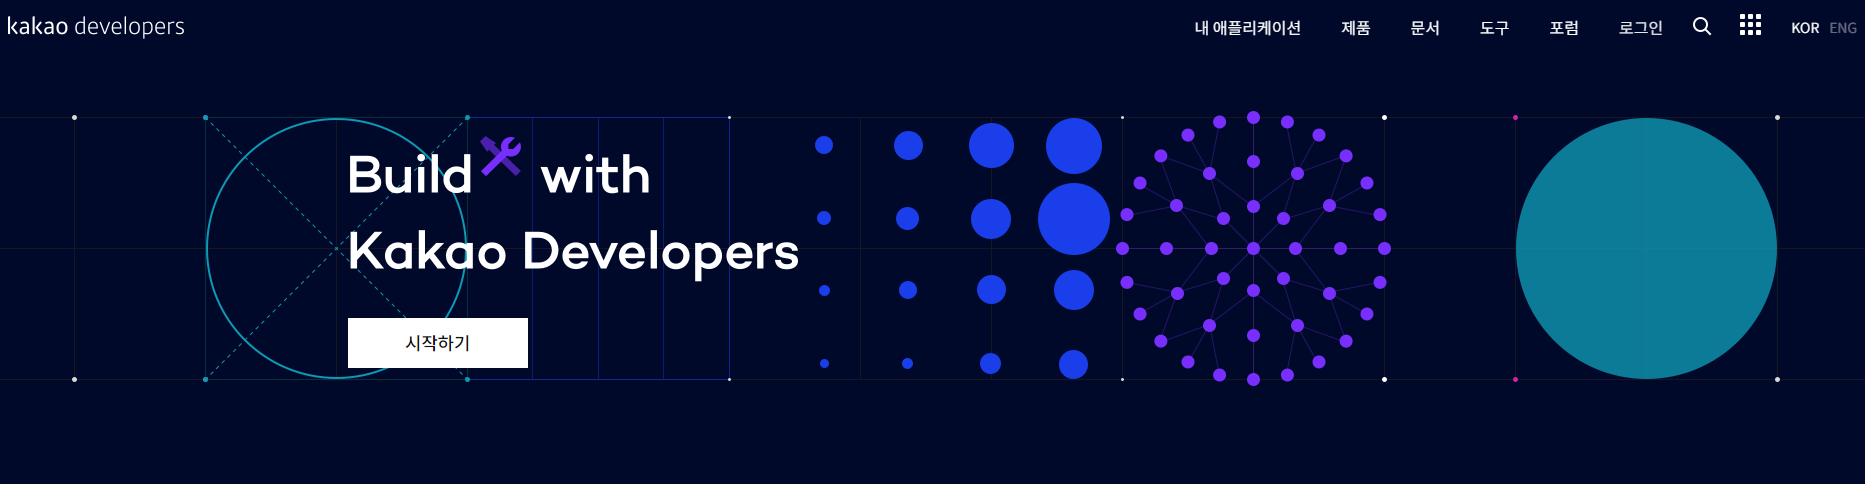
> 출처: [kakao developers](https://developers.kakao.com/)

* Step 1: `카카오 계정 가입` (이미 계정이 존재한다면 Step 3로 넘어가주세요 😁)
* Step 2: `개발자 등록`
* Step 3: `API 키 획득`
* Step 4: `[사용자 관리] 활성화`
* Step 5: `사용자 토큰 얻기`
* Step 6: `로그인 기반 서비스 동의항목 설정`

카카오 서비스에서는 앱 단위로 구분하여 사용자에게 허락된 서비스의 API키를 관리하는데요. 

Step 3에서는 kakao developers 페이지의 **앱 만들기**를 통해 개인 고유의 API 키를 발급 받으시면 됩니다 👌



이후 나머지 Step을 모두 진행한 후, 아래와 같이 코드를 작성해서 address에 저장한 주소를 카카오 API를 통해 자치구를 알아낼 수 있습니다!

코드가 올바르게 작동했다면 Json 형태로 나타나는 값들 중 'region_2depth_name'에 해당하는 자치구 값이 'gu' 컬럼에 들어가게 됩니다 😊

In [ ]:
for i in tqdm(range(len(seoul_df))):
  if len(seoul_df['gu'].iloc[i]) > 4:
    address = seoul_df['addr_kr'].iloc[i]
    url = 'http://dapi.kakao.com/v2/local/search/address.json?&query=' + '서울특별시' + address
    result = requests.get(urlparse(url).geturl(),
                          headers={'Authorization':'# 여기에 본인의 API키를 입력하세요 #'})
    json_obj = result.json()
    try:
      seoul_df['gu'].iloc[i] =  json_obj['documents'][0]['address']['region_2depth_name']
    except:
      seoul_df['gu'].iloc[i] = ''

 34%|███▍      | 251800/742285 [00:02<00:04, 114064.08it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 742285/742285 [2:22:13<00:00, 86.98it/s]  


In [ ]:
for i in tqdm(range(len(busan_df))):
  if len(busan_df['gu'].iloc[i]) > 4:
    address = busan_df['addr_kr'].iloc[i]
    url = 'http://dapi.kakao.com/v2/local/search/address.json?&query=' + '부산광역시' + address
    result = requests.get(urlparse(url).geturl(),
                          headers={'Authorization':'# 여기에 본인의 API키를 입력하세요 #'})
    json_obj = result.json()
    try:
      busan_df['gu'].iloc[i] =  json_obj['documents'][0]['address']['region_2depth_name']
    except:
      busan_df['gu'].iloc[i] = ''

100%|██████████| 474268/474268 [04:07<00:00, 1914.69it/s]


만약 api로도 검색 불가한 주소행이 있다면 행 전체를 삭제하겠습니다 🙂

In [ ]:
seoul_df.drop(seoul_df[(seoul_df['gu'] =='')].index, inplace=True)
busan_df.drop(busan_df[(busan_df['gu'] =='')].index, inplace=True)

그럼 이제 자치구(gu)별 아파트 실거래가, 평당가의 평균을 확인해볼까요?

그래프도 그려서 비교해보겠습니다!

In [ ]:
# 서울특별시 자치구별 아파트 실거래가와 평당가의 평균을 출력합니다.
seoul_df.groupby('gu').mean().sort_values('price_per_area', ascending=False).iloc[:,6:8]

,transaction_real_price,price_per_area
gu,,
강남구,94978.164412,3794.835767
서초구,93760.450548,3185.945881
송파구,69447.390203,2905.342085
용산구,84635.434044,2792.687490
광진구,56677.571810,2230.737486
마포구,52881.136046,2220.311329
성동구,52946.757005,2169.933514
강동구,46180.322386,2088.872641
중구,53621.843017,2083.428510


In [ ]:
# 부산광역시 자치구별 아파트 실거래가와 평당가의 평균을 출력합니다.
busan_df.groupby('gu').mean().sort_values('price_per_area', ascending=False).iloc[:,6:8]

,transaction_real_price,price_per_area
gu,,
수영구,26188.155107,1042.493243
해운대구,26930.565552,1022.319788
강서구,30938.187843,976.839226
연제구,24178.487135,935.005405
동래구,23279.718287,931.233861
금정구,22736.463471,889.727201
남구,23469.688425,874.785105
부산진구,18753.698471,862.029252
동구,18717.596677,821.743054


In [ ]:
# 평균 기준으로 내림차순 정렬한 후 인덱스 값들을 저장합니다.
hue_order = seoul_df.groupby('gu').mean().sort_values('price_per_area', ascending=False).index

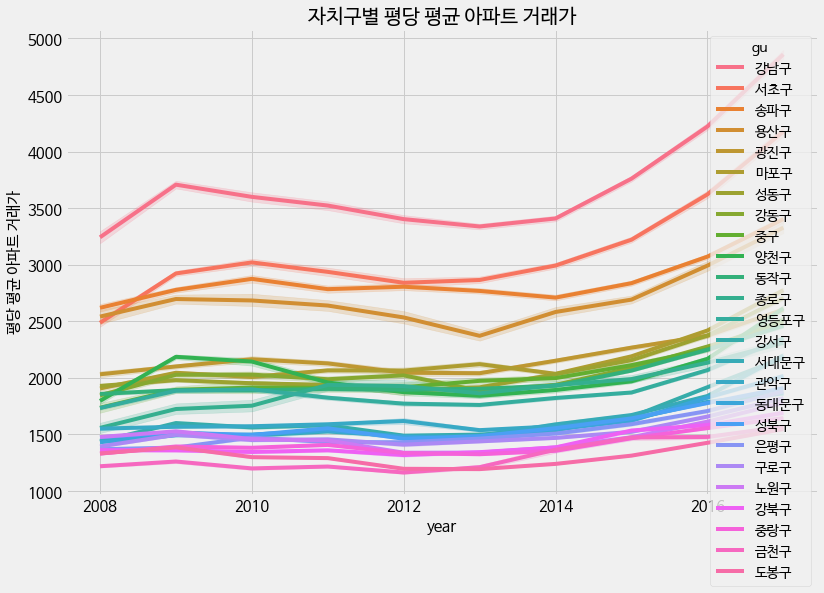

In [ ]:
# 자치구별 평당가의 평균을 비교합니다.

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='price_per_area', data=seoul_df, hue='gu', hue_order= hue_order)
plt.title('자치구별 평당 평균 아파트 거래가', size = 20)

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.xlabel('year', size = 15)
plt.ylabel('평당 평균 아파트 거래가', size = 15)
plt.show()

In [ ]:
# 서울특별시, 부산광역시 자치구의 고유값의 개수를 출력합니다.
print('서울:', len(seoul_df['gu'].unique()), len('부산:', busan_df['gu'].unique()))

25 16


어떤가요? 행정구로 범주를 재설정한 것이 유의미해 보이죠???




지금까지의 과정을 순서대로 정리해볼게요 😄

* 서울특별시는 330개, 부산광역시는 147개 범주의 법정동명을 가지고 있었습니다.
* 이를 인코딩하기엔 범주의 개수가 너무 많기 때문에, 상위 범주인 자치구 정보를 얻었습니다.
* 그 결과 서울특별시에서 25개, 부산광역시에서 16개의 자치구를 얻었고 이는 상대적으로 인코딩하기 쉽습니다.

그렇다면, 법정동 정보는 포기해야 하는 것일까요? <br>
무턱대고 그럴 수는 없겠죠... 😂 

연도별로 법정동별 평당 거래가의 평균을 계산해서 변수를 생성해줍시다.

이렇게 하면 법정동 특성이 유효하게 작용할 수도 있을 것 같아요 👌

In [ ]:
# 서울특별시의 연도, 자치구, 법정동으로 그룹화하여 평당가의 평균을 계산합니다.
price_year_s = seoul_df.groupby(['year','gu','dong']).mean()['price_per_area']

In [ ]:
# 부산광역시의 연도, 자치구, 법정동으로 그룹화하여 평당가의 평균을 계산합니다.
price_year_b = busan_df.groupby(['year','gu','dong']).mean()['price_per_area']

In [ ]:
# 연도별로 법정동별 평당 거래가 평균을 나타내는 변수를 생성합니다. (우선 컬럼의 모든 값에 0을 넣어줍니다.)
seoul_df['dong_year_mean_price'] = 0
busan_df['dong_year_mean_price'] = 0

In [ ]:
# 서울특별시의 연도별로 법정동별 평동 거래가 평균을 계산해서 'dong_year_mean_price' 컬럼에 넣어줍니다.
i = 0
for year, gu, dong in zip(tqdm(seoul_df['year']), seoul_df['gu'], seoul_df['dong']):
  seoul_df['dong_year_mean_price'].iloc[i] = price_year[year][gu][dong]
  i+=1

In [ ]:
# 부산광역시의 연도별로 법정동별 평동 거래가 평균을 계산해서 'dong_year_mean_price' 컬럼에 넣어줍니다.
i = 0
for year, gu, dong in zip(tqdm(busan_df['year']), busan_df['gu'], busan_df['dong']):
  busan_df['dong_year_mean_price'].iloc[i] = price_year[year][gu][dong]
  i+=1

100%|██████████| 474268/474268 [04:10<00:00, 1889.78it/s]


---

## 3.2 park, day_care_center 데이터

**역세권**, **스세권** 등 아파트 근처에 가까운 역이 있는가, 특정 카페가 있는가 등이 아파트 가격 형성에 큰 영향을 주고 있는데요,

그렇다면, 근린 공원이 있는 아파트인지,

아이를 믿고 맡길 수 있는 어린이집이나 학교가 많은 지역인지,

여부가 해당 아파트 가격에 영향을 주겠네요!


우리는 train, test 데이터 이외에도 몇 개의 데이터를 추가적으로 보유하고 있었어요.

그게 무슨 데이터인지 기억 나시나요?



바로 서울/부산 지역의 공원과 어린이집에 대한 정보를 나타내는 `park`, `day_care_center` 데이터에요. 



그래서! 두 데이터를 추가적으로 활용한다면 예측 성능을 더 높일 수 있을지도 몰라요 😮 <br>
그러니 직접 모델을 돌려 확인해봐야겠죠? <br>



이 데이터들을 가장 쉽게 활용할 수 있는 방법으로는 <br>
**각 시군구 혹은 법정동에 포함된 공원, 어린이집의 개수를 각각의 컬럼으로 추가**해볼 수 있을 것 같아요. 



그럼, 시작해볼까요? 😎😎

In [ ]:
# park, day_care_center 데이터를 불러옵니다.
park = pd.read_csv('park.csv')
dcc = pd.read_csv('day_care_center.csv')

In [ ]:
# park 데이터를 확인합니다.
park.head()

In [ ]:
# day_care_center 데이터를 확인합니다.
dcc.head()

이번에도 서울특별시와 부산광역시를 나눠서 살펴볼게요!

In [ ]:
# park 데이터를 'city' 컬럼 기준으로 나눕니다.
seoul_park = park.loc[park['city']=='서울특별시']
busan_park = park.loc[park['city']=='부산광역시']
# day_care_center 데이터를 'city' 컬럼 기준으로 나눕니다.
seoul_dcc = dcc.loc[dcc['city']=='서울특별시']
busan_dcc = dcc.loc[dcc['city']=='부산광역시']

In [ ]:
# 구('gu'), 동('dong') 컬럼을 기준으로 공원 이름('park_name')의 개수를 카운트합니다.
s_park_dong = seoul_park.groupby(['gu','dong'])['park_name'].count()
b_park_dong = busan_park.groupby(['gu','dong'])['park_name'].count()
# 구('gu') 컬럼을 기준으로 어린이집 이름('day_care_name')의 개수를 카운트합니다.
s_dcc_gu = seoul_dcc.groupby('gu')['day_care_name'].count()
b_dcc_gu = busan_dcc.groupby('gu')['day_care_name'].count()

In [ ]:
# 'park_num', 'dcc_num' 컬럼을 생성합니다.
seoul_df['park_num'] = 0
seoul_df['dcc_num'] = 0

busan_df['park_num'] = 0
busan_df['dcc_num'] = 0

In [ ]:
# 서울특별시의 각 시군구, 법정동에 포함된 공원, 어린이집의 개수를 컬럼의 값으로 넣어줍니다.
i = 0
for gu, dong in zip(tqdm(seoul_df['gu']), seoul_df['dong']):
  try:
    seoul_df['park_num'].iloc[i] = s_park_dong[gu][dong]
    seoul_df['dcc_num'].iloc[i] = s_dcc_gu[gu]
  except:
    pass
  i += 1

  0%|          | 0/742088 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 742088/742088 [07:16<00:00, 1700.81it/s]


In [ ]:
# 부산광역시의 각 시군구, 법정동에 포함된 공원, 어린이집의 개수를 컬럼의 값으로 넣어줍니다.
i = 0
for gu, dong in zip(tqdm(busan_df['gu']), busan_df['dong']):
  try:
    busan_df['park_num'].iloc[i] = b_park_dong[gu][dong]
    busan_df['dcc_num'].iloc[i] = b_dcc_gu[gu]
  except:
    pass
  i += 1

  0%|          | 0/474268 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 474268/474268 [05:40<00:00, 1391.15it/s]


### concat(): 데이터 합치기

서울특별시, 부산광역시로 나눠서 분석을 끝냈으니, 이제 다시 하나의 데이터로 합쳐줘야 합니다. <br>
이때 사용할 수 있는 것이 **Pandas** 패키지의 **concat()** 함수입니다.

사실 Stage 3에서도 concat 함수를 사용한 적이 있는데요 😁 <br>
이번에는 두 데이터프레임을 행 방향(위아래)로 합쳐주기 위해 `axis=0`이라는 옵션을 적어주겠습니다!
* `pd.concat([데이터프레임1, 데이터프레임2], axis=0)`

In [ ]:
# 서울특별시, 부산광역시 데이터를 행 방향으로 합쳐줍니다.
train = pd.concat([seoul_df, busan_df], axis=0)

In [ ]:
# 두 데이터프레임이 잘 합쳐졌는지 확인합니다.
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,gu,price_per_area,year,gu_year_mean_price,dong_year_mean_price,park_num,dcc_num
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,종로구,1458.971941,2008,1557.268394,1493.987267,0,0
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,종로구,665.523848,2008,1557.268394,1498.462469,0,0
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,종로구,1499.291952,2008,1557.268394,1498.462469,0,0
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,종로구,2660.017761,2008,1557.268394,2579.879950,0,0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,종로구,2036.722728,2008,1557.268394,2579.879950,0,0


---

# 4. 추가 전처리하기

## 4.1 apt brand 평판 컬럼 생성

이번에는 아파트의 브랜드 평판 랭킹을 데이터에 반영해보겠습니다 😎 

국내 아파트에 대한 브랜드를 대상으로 진행한 평판 분석 결과에 따르면, 다음과 같이 24개 브랜드 순으로 평판지수가 높은 것으로 나타났습니다.

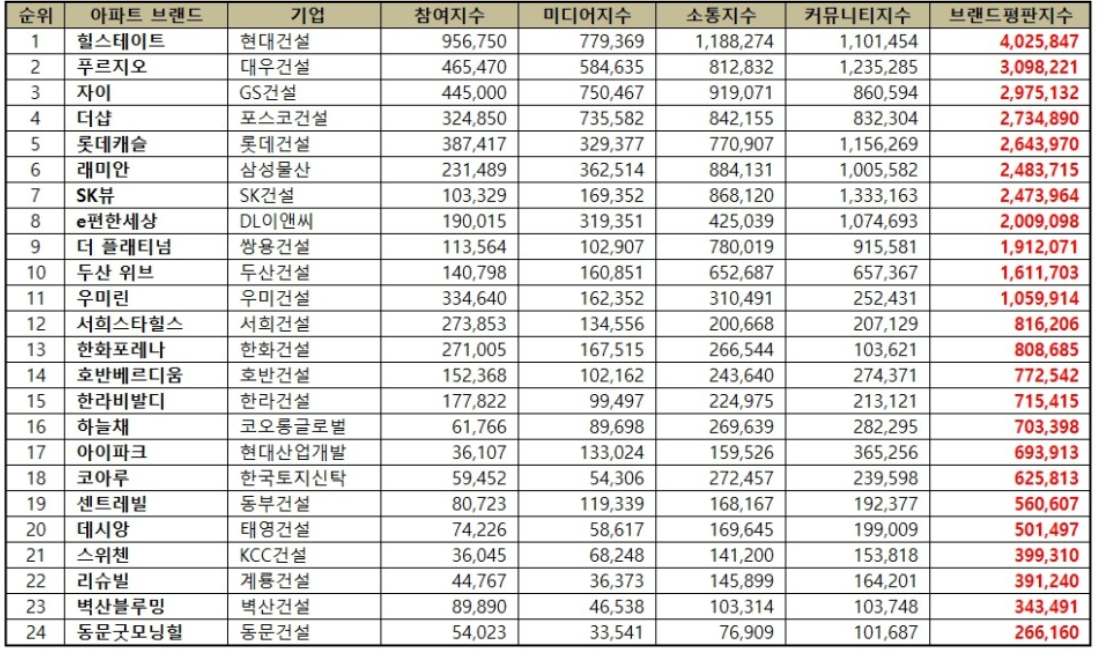

평판이 좋은 상위 24개의 아파트에 해당하면 1, 그렇지 않으면 0을 표시하는 `'top_branded'` 컬럼을 생성해보겠습니다!

In [ ]:
brand_ranked = ['힐스테이트', '푸르지오', '자이', '더샵', '롯데캐슬', '래미안', 
                '아이파크', 'e편한세상', '위브', '한화포레나', '우미린', 'SK뷰', 
                '호반베르디움', '서희스타힐스', '한라비발디', '하늘채', 
                '더플래티넘', '코아루', '센트레빌', '데시앙', '스위첸', '리슈빌',
                '벽산블루밍', '동문굿모닝힐']

In [ ]:
train['top_branded'] = 0
for brand in brand_ranked:
    train['top_branded'].loc[train['apt'].str.contains(brand)] = 1

---

## 4.2 자치구 라벨인코딩

이번에는 자치구('gu') 컬럼에 라벨인코딩을 적용해줄 거에요. 

문자를 숫자로 변경해줘야 나중에 모델에 집어넣을 수 있겠죠? 😊

아, 그런데 서울특별시와 부산광역시 데이터를 하나의 train 데이터로 합치면서 문제가 발생했어요 😮 

두 도시 모두 '강서구'라는 자치구가 존재한다는 점인데요.

이런 경우에는 '강서구'를 '서울의 강서구'와 '부산의 강서구'로 구분할 필요가 있을 것 같아요.

In [ ]:
# 서울의 강서구와 부산의 강서구를 구분해줍니다.
train.loc[(train['gu']=='강서구')&(train['city']=='서울특별시'),'gu'] = '서울_강서구'
train.loc[(train['gu']=='강서구')&(train['city']=='부산광역시'),'gu'] = '부산_강서구'

자치구별 평단가 평균을 오름차순으로 정렬한 후,

가장 작은 값이 1로 변환될 수 있게끔 라벨인코딩을 수행하겠습니다 😁

In [ ]:
gu_price = train.groupby('gu')['price_per_area'].mean().sort_values(ascending=True)

for i, gu in enumerate(tqdm(gu_price.index)):
    train['gu'].loc[train['gu'] == gu] = i

  0%|          | 0/40 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 40/40 [00:05<00:00,  7.09it/s]


# 5. 기존 전처리 적용하기

이제, Stage 3에서 수행했던 전처리 코드를 가져와서 train 데이터에 빠르게 적용해보겠습니다!

기존 전처리는 그대로 적용한 후에 모델링을 진행해줘야 하니까요 😃

In [ ]:
train['age'] = train['year'] - train['year_of_completion']

In [ ]:
# re 모듈을 선언하고 괄호와 괄호 안 문자를 찾아서 삭제합니다.
import re

regex = "\(.*\)"

for i in tqdm(range(len(train))):
   train.at[i, 'apt'] = re.sub(regex, '', train.at[i, 'apt'])

100%|██████████| 1216553/1216553 [00:42<00:00, 28430.82it/s]


In [ ]:
apt_brand_list = train['apt'].value_counts()[:20].index

In [ ]:
# 상위 20개 아파트 이름에 속하는지를 구별하는 변수를 생성합니다.
train['branded'] = False

# 아파트 이름이 리스트 안의 브랜드를 가지고 있다면 대표 이름으로 바꿔고 branded 변수를 True로 바꿉니다.
for brand in tqdm(apt_brand_list):
  train['apt'].loc[train['apt'].str.contains(brand)] = brand
  train['branded'].loc[train['apt'].str.contains(brand)] = True

# branded 변수가 False인 아파트를 others라는 이름으로 통합합니다.
train['apt'].loc[~train['branded']] = 'others'

  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


In [ ]:
apt_price = train.groupby('apt')['price_per_area'].mean().sort_values(ascending=True)

for i, apt in enumerate(tqdm(apt_price.index)):
    train['apt'].loc[train['apt'] == apt] = i

100%|██████████| 20/20 [00:02<00:00,  7.89it/s]


In [ ]:
train.loc[train['age']<20, 'reconstruction'] = 0
train.loc[train['age']>=20, 'reconstruction'] = 1

In [ ]:
train.loc[train['city']=='서울특별시', 'city'] = 0
train.loc[train['city']=='부산광역시', 'city'] = 1

In [ ]:
train.drop(columns=['transaction_id','apartment_id','dong','jibun','addr_kr','transaction_date','transaction_year_month','floor','branded'],inplace=True)

In [ ]:
train['transaction_real_price'] = np.log1p(train['transaction_real_price'])
train  = train.loc[train['price_per_area']>= 200, :]

In [ ]:
X = train.drop(columns=['price_per_area','transaction_real_price'])
Y = train['transaction_real_price']

# 6. test 데이터에 전처리 적용하기

train 데이터에서 적용한 전처리를 test 데이터에도 적용해줘야겠죠? 🙂

우선 test 데이터를 한번 확인해볼게요.

In [ ]:
test.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21


그런데 잠시만요! <br>
이쯤에서 복습 차원으로 간단한 전처리 퀴즈 하나만 풀어보고 넘어가겠습니다 😉

---

## 퀴즈

### 설명

'city'가 서울특별시인 경우에 해당하는 test 데이터를 'seoul_test', <br>
부산광역시인 경우에 해당하는 test 데이터를 'busan_test'라는 객체에 저장해봅시다.

### 풀이 - 힌트

우리는 앞서 `3.1 자치구별 법정동 데이터` 파트에서 <br>
'city'가 서울특별시, 부산광역시에 해당하는 train 데이터를 각각 'seoul_df', 'busan_df'라는 객체에 저장하였습니다.

이번에도 똑같은 방법을 사용해서 퀴즈를 풀어봅시다 😎

### 풀이 - 정답

```
# 서울특별시, 부산광역시 데이터를 각각 따로 저장해줍니다.
seoul_test = test[test['city']=='서울특별시']
busan_test = test[test['city']=='부산광역시']
```

---

## 6.1 전처리 적용하기

이제 test 데이터에 나머지 전처리 과정을 빠르게 적용해주겠습니다!

In [ ]:
seoul_test.reset_index(drop=True, inplace=True)
busan_test.reset_index(drop=True, inplace=True)

In [ ]:
# 공백을 기준으로, 공백 앞에 있는 문자만 추출해서 저장합니다.
busan_df['dong'] = busan_df['dong'].str.split().str[0]

In [ ]:
test['year'] = test['transaction_year_month'].astype(str).str[:4].astype(int)

In [ ]:
busan_test['dong'] = busan_test['dong'].str.split().str[0]

In [ ]:
seoul_test['gu'] = ''
busan_test['gu'] = ''

In [ ]:
for i, dong in enumerate(tqdm(seoul_test['dong'])):
  key = [k for k, v in seoul_dict.items() if dong in v]
  seoul_test['gu'].iloc[i] = ','.join(key)

  0%|          | 0/3911 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 3911/3911 [00:02<00:00, 1704.04it/s]


In [ ]:
for i, dong in enumerate(tqdm(busan_test['dong'])):
  key = [k for k, v in busan_dict.items() if dong in v]
  busan_test['gu'].iloc[i] = ','.join(key)

100%|██████████| 1552/1552 [00:01<00:00, 1407.41it/s]


In [ ]:
for i in tqdm(range(len(seoul_test))):
  if len(seoul_test['gu'].iloc[i]) > 4:
    address = seoul_test['addr_kr'].iloc[i]
    url = 'http://dapi.kakao.com/v2/local/search/address.json?&query=' + '서울특별시' + address
    result = requests.get(urlparse(url).geturl(),
                          headers={'Authorization':'# 여기에 본인의 API키를 입력하세요 #'})
    json_obj = result.json()
    try:
      seoul_test['gu'].iloc[i] =  json_obj['documents'][0]['address']['region_2depth_name']
    except:
      seoul_test['gu'].iloc[i] = ''

100%|██████████| 3911/3911 [00:46<00:00, 83.99it/s]


In [ ]:
for i in tqdm(range(len(busan_test))):
  if len(busan_test['gu'].iloc[i]) > 4:
    address = busan_test['addr_kr'].iloc[i]
    url = 'http://dapi.kakao.com/v2/local/search/address.json?&query=' + '부산광역시' + address
    result = requests.get(urlparse(url).geturl(),
                          headers={'Authorization':'# 여기에 본인의 API키를 입력하세요 #'})
    json_obj = result.json()
    try:
      busan_test['gu'].iloc[i] =  json_obj['documents'][0]['address']['region_2depth_name']
    except:
      busan_test['gu'].iloc[i] = ''

100%|██████████| 1552/1552 [00:03<00:00, 512.51it/s]


In [ ]:
seoul_test['gu_year_mean_price'] = 0
busan_test['gu_year_mean_price'] = 0
seoul_test['dong_year_mean_price'] =0
busan_test['dong_year_mean_price'] =0

<ipython-input-85-f0760389b5c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_test['gu_year_mean_price'] = 0
<ipython-input-85-f0760389b5c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan_test['gu_year_mean_price'] = 0
<ipython-input-85-f0760389b5c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [ ]:
i=0
for year, gu in zip(tqdm(seoul_test['year']), seoul_test['gu']):
  try:
    seoul_test['gu_year_mean_price'].iloc[i] = price_year_gu_s[year][gu]
  except:
    seoul_test['gu_year_mean_price'].iloc[i] = 0
  i+=1

  0%|          | 0/3911 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
100%|██████████| 3911/3911 [00:04<00:00, 943.13it/s] 


In [ ]:
i=0
for year, gu in zip(tqdm(busan_test['year']), busan_test['gu']):
  try:
    busan_test['gu_year_mean_price'].iloc[i] = price_year_gu_b[year][gu]
  except:
    busan_test['gu_year_mean_price'].iloc[i] = 0
  i+=1

100%|██████████| 1552/1552 [00:00<00:00, 2532.72it/s]


In [ ]:
i=0
for year, gu, dong in zip(tqdm(seoul_test['year']), seoul_test['gu'], seoul_test['dong']):
  try:
    seoul_test['dong_year_mean_price'].iloc[i] = price_year_s[year][gu][dong]
  except:
    seoul_test['dong_year_mean_price'].iloc[i] = 0
  i+=1

100%|██████████| 3911/3911 [00:02<00:00, 1578.56it/s]


In [ ]:
i=0
for year, gu, dong in zip(tqdm(busan_test['year']), busan_test['gu'], busan_test['dong']):
  try:
    busan_test['dong_year_mean_price'].iloc[i] = price_year_b[year][gu][dong]
  except:
    busan_test['dong_year_mean_price'].iloc[i] = 0
  i+=1

100%|██████████| 1552/1552 [00:00<00:00, 1597.71it/s]


In [ ]:
seoul_test['park_num'] = 0
seoul_test['dcc_num'] = 0

busan_test['park_num'] = 0
busan_test['dcc_num'] = 0

<ipython-input-90-23a491114ef8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_test['park_num'] = 0
<ipython-input-90-23a491114ef8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_test['dcc_num'] = 0
<ipython-input-90-23a491114ef8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [ ]:
i=0
for gu, dong in zip(tqdm(seoul_test['gu']), seoul_test['dong']):
  try:
    seoul_test['park_num'].iloc[i] = s_park_dong[gu][dong]
    seoul_test['dcc_num'].iloc[i] = s_dcc_gu[gu]
  except:
    pass
  i += 1

100%|██████████| 3911/3911 [00:02<00:00, 1321.29it/s]


In [ ]:
i=0
for gu, dong in zip(tqdm(busan_test['gu']), busan_test['dong']):
  try:
    busan_test['park_num'].iloc[i] = b_park_dong[gu][dong]
    busan_test['dcc_num'].iloc[i] = b_dcc_gu[gu]
  except:
    pass
  i += 1

100%|██████████| 1552/1552 [00:01<00:00, 1138.64it/s]


In [ ]:
test = pd.concat([seoul_test, busan_test], axis=0)

In [ ]:
test['top_branded'] = 0
for brand in brand_ranked:
    test['top_branded'].loc[test['apt'].str.contains(brand)] = 1

In [ ]:
test.loc[(test['gu']=='강서구')&(test['city']=='서울특별시'),'gu'] = '서울_강서구'
test.loc[(test['gu']=='강서구')&(test['city']=='부산광역시'),'gu'] = '부산_강서구'

In [ ]:
for i, gu in enumerate(tqdm(gu_price.index)):
        test['gu'].loc[test['gu'] == gu] = i+1

test.loc[test['gu'] == '','gu'] = 0

100%|██████████| 40/40 [00:00<00:00, 576.75it/s]


In [ ]:
test['age'] = test['year'] - test['year_of_completion']

test['age'] = test['year'] - test['year_of_completion']

test['branded'] = False

for brand in tqdm(apt_brand_list):
  test['apt'].loc[test['apt'].str.contains(brand)] = brand
  test['branded'].loc[test['apt'].str.contains(brand)] = True

test['apt'].loc[~test['branded']] = 'others'

for i, apt in enumerate(tqdm(apt_price.index)):
    test['apt'].loc[test['apt'] == apt] = i

test.loc[test['age']<20, 'reconstruction'] = 0
test.loc[test['age']>=20, 'reconstruction'] = 1

test.loc[test['city']=='서울특별시', 'city'] = 0
test.loc[test['city']=='부산광역시', 'city'] = 1

100%|██████████| 20/20 [00:00<00:00, 909.45it/s]


In [ ]:
test.drop(columns=['transaction_id','apartment_id','dong','jibun','addr_kr','transaction_date','transaction_year_month','floor','branded'],inplace=True)

와우! 기존 전처리와 새로운 전처리를 test 데이터에 모두 반영해주었어요 😊



다음 과정인 하이퍼파라미터 튜닝으로 넘어가기 전에, <br>
튜닝을 하지 않은 상태의 모델을 생성하여 성능을 한번 측정해볼까요? 



그러면 나중에 튜닝을 했을 때의 모델 성능과 비교해볼 수 있으니까요! 😁

---

# 7. 데이터 추가 후 모델링

데이터를 추가하여 새로운 인사이트로 전처리한 것이 아파트 실거래가 예측에 도움이 되는지 봐야겠죠?

**RMSE**를 통해 성능평가를 진행해보도록 하겠습니다.

train : validation : test 의 비율은 **6:2:2**가 기본이므로

기본 공식에 따라 진행하겠습니다 😁😁




In [ ]:
# 성능 평가
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 부스팅 모델 검증
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

또한 Stage 5에서 선택한 모델이 XGBoost, LightGBM, RandomForest 였죠?

기본 전처리만 진행한 성능은 다음과 같았습니다.
* **XGBoost : 0.3445**
* **LightGBM : 0.3235**
* **RandomForest : 0.2133**

과연 !!! 추가 데이터를 사용한 결과는 어떻게 될까요 ??

Stage 5에서 무조건 성능만 좋다고 모델을 선택하면 안 된다고 했죠? <br>
예측하는데 걸리는 <font color=blue>**시간**</font>도 중요하답니다 !

그래서 🏢**한남더힐의 꿀팁**🏢 또 들어갑니다 

<font color=orange>**time.time()**</font>은 컴퓨터의 현재 시간을 구하는 함수입니다 !

따라서 모델이 끝났을때 시간에서 시작할때 시간을 빼면 <br>
모델링하는데 걸린 시간을 바로 알수있겠죠?

---

## RandomForest

모델비교중 가장 성능이 좋았던 랜덤포레스트 먼저 보겠습니다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [ ]:
start = time.time()

model_rf = rf.fit(X_tr, y_tr)

end = time.time()

rf_time = end - start

In [ ]:
rf_test_pred = model_rf.predict(X_test)

RMSE와 소요시간을 같이 보도록 해요 ⌛

In [ ]:
print('RMSE:', RMSE(y_test, rf_test_pred), ' RF time:', rf_time, 'sec')

RMSE: 0.09789991130319724  RF time: 442.71432971954346 sec


랜덤포레스트의 RMSE값은 약 0.0979로, 데이터를 추가하기 전인 0.2133 보다 휠씬 좋은 성능을 보이네요!

Stage 6에서 고생한 보람이 있는 것 같아 보이는데요, 나머지 모델들도 성능 비교를 해봅시다!

---

## LightGBM

다음으로는 LightGBM입니다.



Stage 5에서도 시간은 짧게 걸리지만 성능이 좋아서 기대가 컸던 모델인데요.

과연 RMSE 결과는.....? 🧐

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgb = LGBMRegressor(objective='regression', random_state = 42)

In [ ]:
start = time.time()

model_lgb =  lgb.fit(X_tr, y_tr, eval_set =[(X_tr, y_tr), (X_val, y_val)], eval_metric = 'rmse', early_stopping_rounds=50)

end = time.time()

lgb_time = end - start

[1]	training's l2: 0.41294	training's rmse: 0.642604	valid_1's l2: 0.413584	valid_1's rmse: 0.643105
Training until validation scores don't improve for 50 rounds.
[2]	training's l2: 0.347037	training's rmse: 0.589099	valid_1's l2: 0.34758	valid_1's rmse: 0.589559
[3]	training's l2: 0.293038	training's rmse: 0.541329	valid_1's l2: 0.293516	valid_1's rmse: 0.541771
[4]	training's l2: 0.248825	training's rmse: 0.498824	valid_1's l2: 0.249248	valid_1's rmse: 0.499247
[5]	training's l2: 0.212601	training's rmse: 0.461087	valid_1's l2: 0.212949	valid_1's rmse: 0.461464
[6]	training's l2: 0.182783	training's rmse: 0.427532	valid_1's l2: 0.183106	valid_1's rmse: 0.427909
[7]	training's l2: 0.158241	training's rmse: 0.397795	valid_1's l2: 0.158507	valid_1's rmse: 0.39813
[8]	training's l2: 0.137937	training's rmse: 0.371398	valid_1's l2: 0.138137	valid_1's rmse: 0.371667
[9]	training's l2: 0.121388	training's rmse: 0.348408	valid_1's l2: 0.121546	valid_1's rmse: 0.348635
[10]	training's l2: 0.1

In [ ]:
lgb_test_pred = model_lgb.predict(X_test)

In [ ]:
print('RMSE:', RMSE(y_test, lgb_test_pred), ' lgb time:', lgb_time, 'sec')

RMSE: 0.16497656900018265  lgb time: 12.074461460113525 sec


우와 !

역시 LightGBM, 멋지다 멋져 👏👏



모델링 시간이 12초 밖에 안걸렸네요!

역시 이름대로 Light한 모델이네요🙆‍♀️🙆‍♀️

---

## XGBoost

마지막 후보는 XGBoost !!

XGBoost는 과거에 굉장히 🔥핫했던 모델🔥인데요

데이터과학 경진대회 커뮤니티인 📊<font color=lightblue>**Kaggle**</font>📊에서 우승자가 가장 많이 쓴 모델이기도 합니다 


In [ ]:
xgb =  XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
start = time.time()

model_xgb =  xgb.fit(X_tr, y_tr, eval_set =[(X_tr, y_tr), (X_val, y_val)] ,early_stopping_rounds=50)

end = time.time()

xgb_time = end - start

In [ ]:
xgb_test_pred = model_xgb.predict(X_test)

In [ ]:
print('RMSE:', RMSE(y_test, xgb_test_pred), ' xgb time:', xgb_time, 'sec')

RMSE: 0.19363074456263685  xgb time: 46.98349666595459 sec


RMSE값은 약 0.1936으로 개선되었네요!

---

##  결과

세 모델의 모델링 결과를 표로 한눈에 보겠습니다📜

|모델|데이터 추가 및 추가 전처리 전|데이터 추가 및 추가 전처리 후|
|:----|:----------|:----------|
|RandomForest|0.2133|0.0979|
|LightGBM|0.3235|0.1650|
|XGBoost|0.3445|0.1936|

세 모델 모두 데이터를 추가하고 전처리를 하니 성능이 더 좋아졌네요!

이대로라면 아파트 실거래가 예측을 더 잘할 수 있겠는데요 👦

---

# 8. train 기간 조절

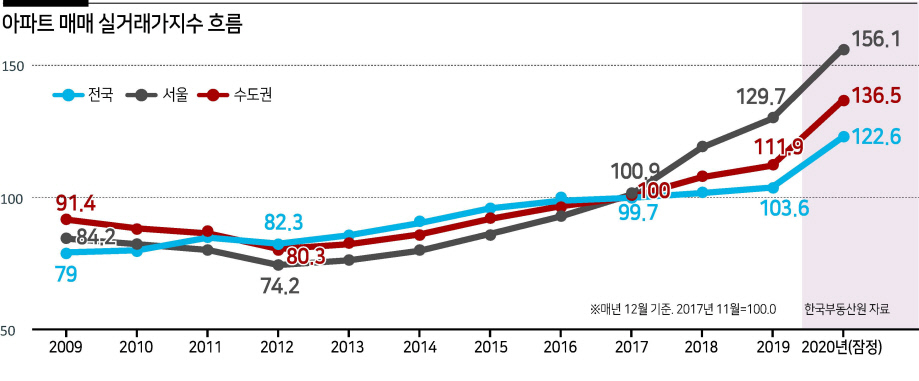

다들 Stage 1에서 colums를 하나씩 봤던거 기억하시나요?

train 데이터의 'transaction_year', 즉, 거래연도가 <font color=green>**2008년에서 2017년**</font>으로 기록돼있습니다.



한국부동산원의 자료를 기반으로, <font color=purple>거래시점에 따라 아파트 실거래가가 매우 다를 수 있을 것</font>이라는 의심을 했었습니다.🤷‍♀️🤷‍♂️🤷



따라서, 최근 아파트 가격을 예측할 때, 아주 과거의 내용까지 살펴보는 것이 바람직한지 궁금합니다.

만약 그렇지 않다면 언제까지 살펴보는 것이 타당한 지도 정해야하겠습니다.

Stage2에서 배운 데이터 분석 방법을 활용해서 거래연도를 다시 살펴볼까요?

In [ ]:
train.groupby('transaction_year').size()

transaction_year
2008    100066
2009    127869
2010    102823
2011     98586
2012     70065
2013    109738
2014    136649
2015    181195
2016    165664
2017    123898
dtype: int64

<font color=purple>**2014년 이후로 아파트 거래가 더 많이 이루어진 것**</font>을 간단하게 확인할 수 있네요.

In [ ]:
train.groupby('transaction_year')['price_per_area'].mean()

transaction_year
2008    1227.554931
2009    1463.038274
2010    1277.597088
2011    1446.475808
2012    1462.791173
2013    1481.783184
2014    1538.405981
2015    1667.018121
2016    1847.773204
2017    2182.478714
Name: price_per_area, dtype: float64

**거래연도가 클수록 평당 거래가의 평균이 높습니다.** 또한, 매우 높은 평당가로 거래된 횟수가 늘어나는 양상이 보입니다 💫



따라서 <font color=purple>2014년 이후의 데이터</font>만 사용하도록 하겠습니다.

---

### 퀴즈

#### 설명

train, test 데이터에서 연도가 **2014년 이후**의 데이터만 모두 추출하여
각각 <font color=orange>train_R, test_R</font>에 할당해봅시다.

#### 풀이 - 힌트

연도를 나타내는 컬럼은 **year**입니다 😀

#### 풀이 - 정답



```
train_R = train.loc[train['year']>2013,:]
test_R = test.loc[test['year']>2013,:]
```



---

어렵지않죠?

그렇다면 2014년 이후의 데이터를 X와 Y로 분리한 후 성능평가를 진행해보겠습니다 😆

In [ ]:
X = train_R.drop(columns=['price_per_area','transaction_real_price'])
Y = train_R['transaction_real_price']

In [ ]:
# 성능 평가
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 부스팅 모델 검증
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

---

# 9. 2014년 이후의 데이터로 모델링

2014년 이후의 데이터만 가지고 성능평가를 진행해보겠습니다 !

과연 !!! 성능이 개선되었을까요 ? 😲😲

**RMSE**를 통해 성능평가를 진행해보도록 하겠습니다.

## RandomForest

In [ ]:
start = time.time()

R_model_rf = rf.fit(X_tr, y_tr)

end = time.time()

rf_R_time = end - start

In [ ]:
R_rf_test_pred = R_model_rf.predict(X_test)

In [ ]:
print('RMSE:', RMSE(y_test, R_rf_test_pred), ' RF time:', rf_R_time, 'sec')

RMSE: 0.0854908726101508  RF time: 207.0343952178955 sec


RandomForest의 RMSE값은 약 0.0855로 성능이 개선되었네요

또한 2014년 이후의 데이터만 사용해서 데이터의 개수가 줄었습니다.
그러다보니 예측 시간도 약 3분으로 줄었구요.

---

## LightGBM

In [ ]:
start = time.time()

R_model_lgb =  lgb.fit(X_tr, y_tr, eval_set =[(X_tr, y_tr), (X_val, y_val)], eval_metric = 'rmse', early_stopping_rounds=50)

end = time.time()

lgb_R_time = end - start

[1]	training's l2: 0.344735	training's rmse: 0.587142	valid_1's l2: 0.344632	valid_1's rmse: 0.587054
Training until validation scores don't improve for 50 rounds.
[2]	training's l2: 0.290142	training's rmse: 0.538648	valid_1's l2: 0.289981	valid_1's rmse: 0.538499
[3]	training's l2: 0.245056	training's rmse: 0.495031	valid_1's l2: 0.244867	valid_1's rmse: 0.49484
[4]	training's l2: 0.208417	training's rmse: 0.456527	valid_1's l2: 0.20822	valid_1's rmse: 0.456312
[5]	training's l2: 0.178169	training's rmse: 0.422101	valid_1's l2: 0.178014	valid_1's rmse: 0.421917
[6]	training's l2: 0.15338	training's rmse: 0.391637	valid_1's l2: 0.153196	valid_1's rmse: 0.391403
[7]	training's l2: 0.132815	training's rmse: 0.364438	valid_1's l2: 0.132633	valid_1's rmse: 0.364187
[8]	training's l2: 0.116045	training's rmse: 0.340653	valid_1's l2: 0.115864	valid_1's rmse: 0.340389
[9]	training's l2: 0.102169	training's rmse: 0.319639	valid_1's l2: 0.102041	valid_1's rmse: 0.319439
[10]	training's l2: 0.0

In [ ]:
R_lgb_test_pred = R_model_lgb.predict(X_test)

In [ ]:
print('RMSE:', RMSE(y_test, R_lgb_test_pred), ' lgb time:', lgb_R_time, 'sec')

RMSE: 0.15043593935629976  lgb time: 8.416025876998901 sec


LightGBM의 RMSE값은 약 0.1504로 성능이 개선되었네요


---

## XGBoost

In [ ]:
start = time.time()

R_model_xgb =  xgb.fit(X_tr, y_tr, eval_set =[(X_tr, y_tr), (X_val, y_val)] ,early_stopping_rounds=50)

end = time.time()

xgb_R_time = end - start

[0]	validation_0-rmse:8.98517	validation_1-rmse:8.98385
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:8.08788	validation_1-rmse:8.08658
[2]	validation_0-rmse:7.28036	validation_1-rmse:7.27919
[3]	validation_0-rmse:6.55385	validation_1-rmse:6.55247
[4]	validation_0-rmse:5.89991	validation_1-rmse:5.89843
[5]	validation_0-rmse:5.31152	validation_1-rmse:5.30985
[6]	validation_0-rmse:4.78188	validation_1-rmse:4.78024
[7]	validation_0-rmse:4.30549	validation_1-rmse:4.30374
[8]	validation_0-rmse:3.87675	validation_1-rmse:3.8749
[9]	validation_0-rmse:3.49094	validation_1-rmse:3.48912
[10]	validation_0-rmse:3.14381	validation_1-rmse:3.14196
[11]	validation_0-rmse:2.83159	validation_1-rmse:2.82973
[12]	validation_0-rmse:2.55076	validation_1-rmse:2.54887
[13]	validation_0-rmse:2.29806	validation_1-rmse:2.29621
[14]	validation_0-rmse:2.07087	validation_1-rmse:2.068

In [ ]:
R_xgb_test_pred = R_model_xgb.predict(X_test)

In [ ]:
print('RMSE:', RMSE(y_test, R_xgb_test_pred), ' xgb time:', xgb_R_time, 'sec')

RMSE: 0.17776235368623197  xgb time: 24.777018785476685 sec


XGBoost의 RMSE값은 0.1778로 역시 성능이 개선되었네요!


---

## 결과

한눈에 알아보기 쉽게 총 결과를 확인해봅시다!

|모델|데이터 추가 및 추가 전처리 전|데이터 추가 및 추가 전처리 후|2014년 이후 데이터로 모델링|
|:----|:----------|:----------|:----------|
|RandomForest|0.2133|0.0979|0.0855|
|LightGBM|0.3235|0.1650|0.1504|
|XGBoost|0.3445|0.1936|0.1778|

세 모델 모두 성능이 좋아진걸 보니까 <font color=green>2014년부터의 학습데이터를 사용하는것이 2018년 실거래가를 예측하는데 도움이 된다</font>는 것을 알 수 있네요

---

# 10. 하이퍼 파라미터 최적화

드디어 모든 전처리가 끝났답니다 👍👍👍

그 다음으로 모델은 하이퍼파라미터 값에 따라 성능이 달라질 수 있습니다.

따라서 우리는 XGBoost, LightGBM, RandomForest에 대한 하이퍼파라미터 튜닝을 진행해보겠습니다 !

튜닝방법으로는 <font color=blue>**그리드서치(GridSearch)**</font>를 이용하겠습니다 !

---

## RandomForest

In [ ]:
rf_params_grid ={
    'n_estimators':[100,150,200,250],
    'max_depth':[10,20,25],
    'max_features': [0.33,1],
    'n_jobs':[-1]
    }

In [ ]:
rf_grid_cv = GridSearchCV(rf, param_grid=rf_params_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_cv.fit(X_train, y_train)

In [ ]:
print('best score :', -rf_grid_cv.best_score_)
print('best parameters :', rf_grid_cv.best_params_)
print('best estimator :', rf_grid_cv.best_estimator_ )

best score : 0.0843531824268285
best parameters : {'max_depth': 25, 'max_features': 0.33, 'n_estimators': 150, 'n_jobs': -1}
best estimator : RandomForestRegressor(max_depth=25, max_features=0.33, n_estimators=150,
                      n_jobs=-1, random_state=42)


In [ ]:
rf_cv_pred = rf_grid_cv.predict(X_test)

In [ ]:
print('RMSE:', RMSE(y_test, rf_cv_pred))

RMSE: 0.07997633532511456


최적화를 마친 RandomForest의 최종 RMSE값은 약 0.0800로 약간의 성능 개선을 보입니다.


---

## LightGBM

In [ ]:
params_grid ={
    'subsample':[0.5,0.7,0.9],
    'learning_rate':[0.1,0.3,0.7],
    'n_estimators':[3000,5000,9000],
    'max_depth' : [5,8,13],
    'colsample_bytree': [0.7,0.8]
}

In [ ]:
# 성능 평가
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 부스팅 모델 검증
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [ ]:
lgb_grid_cv = GridSearchCV(lgb, param_grid=lgb_params_grid, cv=3, scoring='neg_root_mean_squared_error')
lgb_grid_cv.fit(X_train, y_train)

In [ ]:
print('best score :', -lgb_grid_cv.best_score_)
print('best parameters :', lgb_grid_cv.best_params_)
print('best estimator :', lgb_grid_cv.best_estimator_ )

best score : 0.08301108402767063
best parameters : {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 13, 'n_estimators': 9000, 'subsample': 0.6}
best estimator : LGBMRegressor(colsample_bytree=0.7, learning_rate=0.5, max_depth=13,
              n_estimators=9000, objective='regression', random_state=42,
              subsample=0.6)


In [ ]:
lgb_cv_pred = lgb_grid_cv.predict(X_test)

In [ ]:
print('RMSE:', RMSE(y_test, lgb_cv_pred))

RMSE: 0.07941508651674158


최적화를 마친 LightGBM의 최종 RMSE값은 약 0.0794로 엄청난 성능 개선을 보였습니다! 👍👍👍


데이커 여러분들, 이제 하이퍼파라미터 튜닝이 얼마나 중요한지 아시겠죠?! 💖💖

---

## XGBoost

In [ ]:
params_grid ={
    'subsample':[0.7,0.8, 0.9],
    'colsample_bytree' :[0.8, 0.9],
    'learning_rate':[0.1,0.3,0.7],
    'n_estimators':[300,600,800],
    'max_depth' : [5,8]
}

In [ ]:
xgb_grid_cv = GridSearchCV(xgb, param_grid=params_grid, cv=3,  scoring='neg_root_mean_squared_error')
xgb_grid_cv.fit(X_train, y_train)

In [ ]:
print('best score :', -xgb_grid_cv.best_score_)
print('best parameters :', xgb_grid_cv.best_params_)
print('best estimator :', xgb_grid_cv.best_estimator_ )

best score : 0.0830625932356
best parameters : {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.8, 'colsample_bytree': 0.9}
best estimator : XGBRegressor(colsample_bytree=0.9, learning_rate=0.3, max_depth=8,
             n_estimators=800, objective='reg:squarederror', random_state=42,
             subsample=0.8)


In [ ]:
xgb_cv_pred = xgb_grid_cv.predict(X_test)

In [ ]:
print('RMSE:', RMSE(y_test, xgb_cv_pred))

RMSE: 0.08393813953709715


최적화를 마친 XGBoost의 최종 RMSE값은 약 0.0839로 LightGBM처럼 엄청난 성능 개선을 보였네요!🔥





---

# 11. 최종 예측

|모델|데이터 추가 및 추가 전처리 전|데이터 추가 및 추가 전처리 후|2014년 이후 데이터로 모델링|하이퍼 파라미터 최적화 후|
|:----|:----------|:----------|:----------|:----------|
|RandomForest|0.2133|0.0979|0.0855|0.0800|
|LightGBM|0.3235|0.1650|0.1504|0.0794|
|XGBoost|0.3445|0.1936|0.1778|0.0839|

세 모델중에서는 LightGBM이 가장 성능이 좋네요! 

모델 선정에 있어서는 성능과 시간이 모두 중요하다고 언급하였습니다.

|모델|최종 성능|시간(초)|
|:----|:----------|:----------|
|RandomForest|0.0800|90|
|LightGBM|0.0794|104|
|XGBoost|0.0839|652|

LightGBM이 가장 좋은 성능을 보였고, 시간도 가장 빠른 랜덤포레스트에 비해 14초 밖에 차이가 안 나는 걸로 보아 <br>
최종 모델로 <font color=red>**LightGBM**</font>을 선택하는게 가장 합리적인 것 같습니다!

이제 LightGBM 모델로 test 데이터의 아파트 실거래가 최종 예측을 진행해보겠습니다. (두근두근)

In [ ]:
test_pred = lgb_grid_cv.predict(test)

---

# 12. Submission 파일 제출

자 드디어 제출만 하면 됩니다 !

예측값이 담긴 파일 제출을 위해 Stage 6까지 열심히 달려왔는데요

제출만 하면 긴 여정이 끝이 납니다 !!

마지막까지 화이팅 👊👊👊


In [ ]:
# submission 파일 불러오기
submission = pd.read_csv('submission.csv')

아파트 실거래가는 <font color=blue>**np.log1p**</font>로 로그변환을 해주었기 때문에 <font color=blue>**np.expm1**</font>를 꼭 해줘야합니다 !

In [ ]:
submission['transaction_real_price'] = np.expm1(test_pred)

In [ ]:
# submit이라는 이름으로 csv파일로 내보냅니다.
submission.to_csv('submit.csv',index=False)

---

# 13. 결론

아파트 실거래가 예측의 PBL이 모두 끝났습니다 😋

여기까지 따라오신 데이커 여러분께 칭찬의 박수를 한번 더 보내드립니다 👏👏👏

🏢한남더힐의 내집마련 프로젝트🏢 어떠셨나요?


모든 Stage를 완벽하게 복습하고 응용하여 데이콘 대회에서 🥇우승자🥇로 꼭 뵙도록 하겠습니다 😍

한남더힐 팀은 데이커 여러분들을 모두 응원합니다 👊

---

# 참고자료

> * API 개념 (1): [부산시 공공데이터 포털 | 오픈API란](https://data.busan.go.kr/index.nm?contentId=36)
> * API 개념 (2): [나이스 교육정보 개방 포털 | Open API 소개](https://open.neis.go.kr/portal/guide/apiIntroPage.do)
> * API 개념 (3): [wishket | API란? 비개발자가 알기 쉽게 설명해드립니다!](https://blog.wishket.com/api%EB%9E%80-%EC%89%BD%EA%B2%8C-%EC%84%A4%EB%AA%85-%EA%B7%B8%EB%A6%B0%ED%81%B4%EB%9D%BC%EC%9D%B4%EC%96%B8%ED%8A%B8/)
> * 카카오 API 제공: [kakao developers](https://developers.kakao.com/)
> * 유재성 KADE님 코드 : [LightGBM + Optuna로 top 10안에 들어봅시다.](https://dacon.io/competitions/official/21265/codeshare/2876)

---